In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm.callback import log_evaluation
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
%matplotlib inline

In [2]:
df_train=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
df_test=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

# Train Data Analysis

In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_train.shape

(8693, 14)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df_train["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

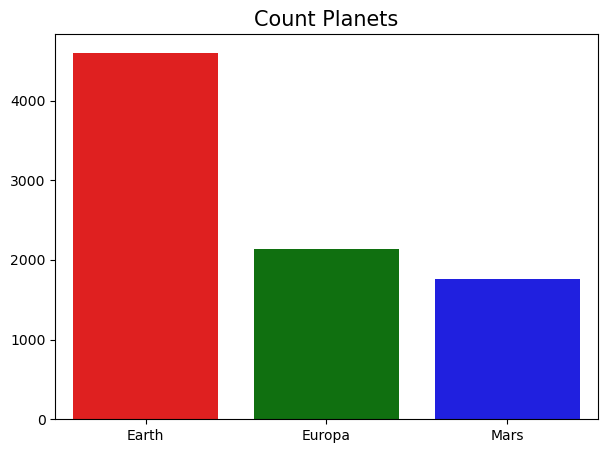

In [9]:
plt.figure(figsize=(7,5))
color=["red","green","blue"]
planet_count = df_train['HomePlanet'].value_counts()
sns.barplot(x=planet_count.index, y=planet_count.values,palette=color)
plt.title("Count Planets",fontsize=15)
plt.show()

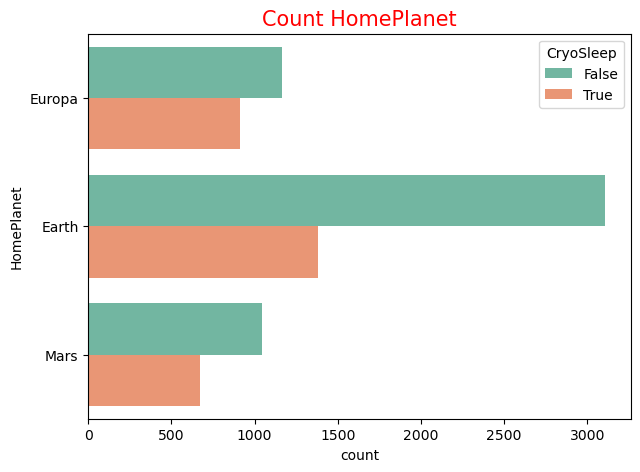

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_train, y="HomePlanet", hue="CryoSleep",palette="Set2")
plt.title("Count HomePlanet",fontsize=15,color="red")
plt.show()

In [11]:
df_train["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

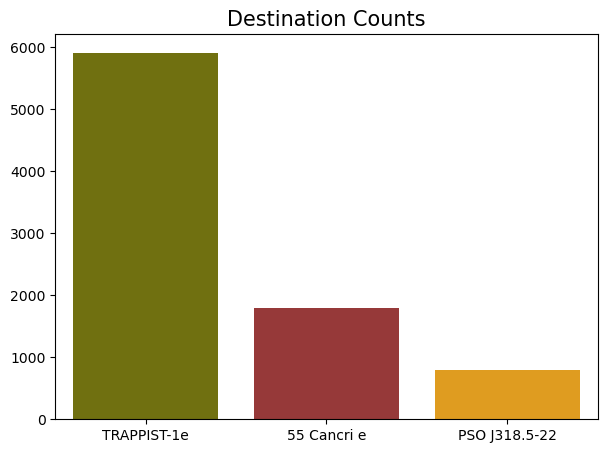

In [12]:
plt.figure(figsize=(7,5))
color1=["olive","brown","orange"]
desti_count = df_train['Destination'].value_counts()
sns.barplot(x=desti_count.index, y=desti_count.values,palette=color1)
plt.title("Destination Counts",fontsize=15)
plt.show()

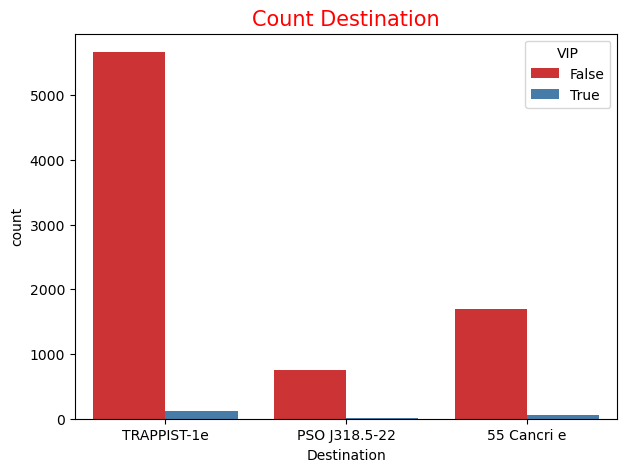

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_train, x="Destination", hue="VIP",palette="Set1")
plt.title("Count Destination",fontsize=15,color="red")
plt.show()

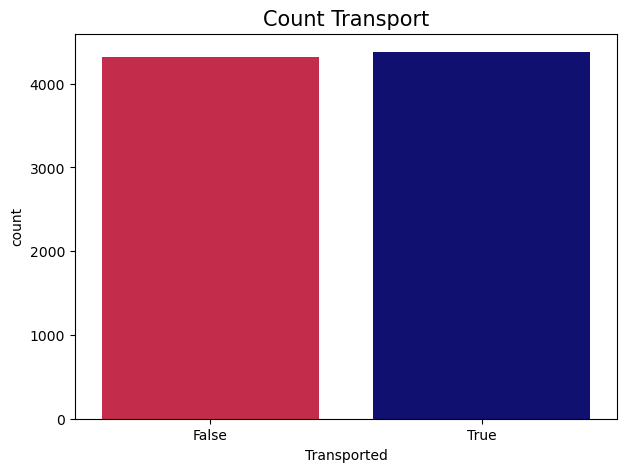

In [14]:
plt.figure(figsize=(7,5))
color0=["crimson","navy"]
sns.countplot(data=df_train, x="Transported",palette=color0)
plt.title("Count Transport",fontsize=15,color="black")
plt.show()

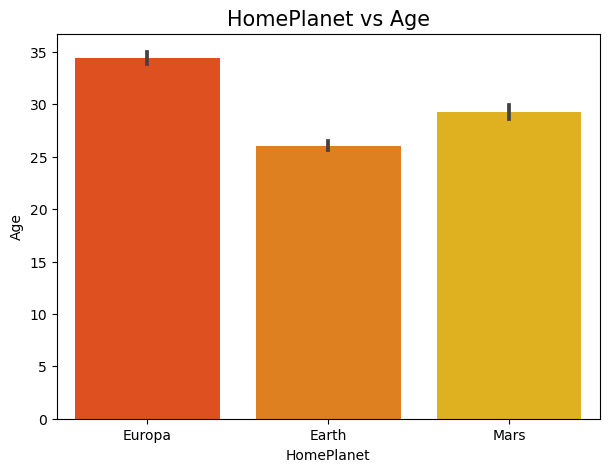

In [15]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_train, x="HomePlanet", y="Age",palette="autumn")
plt.title("HomePlanet vs Age",fontsize=15,color="black")
plt.show()

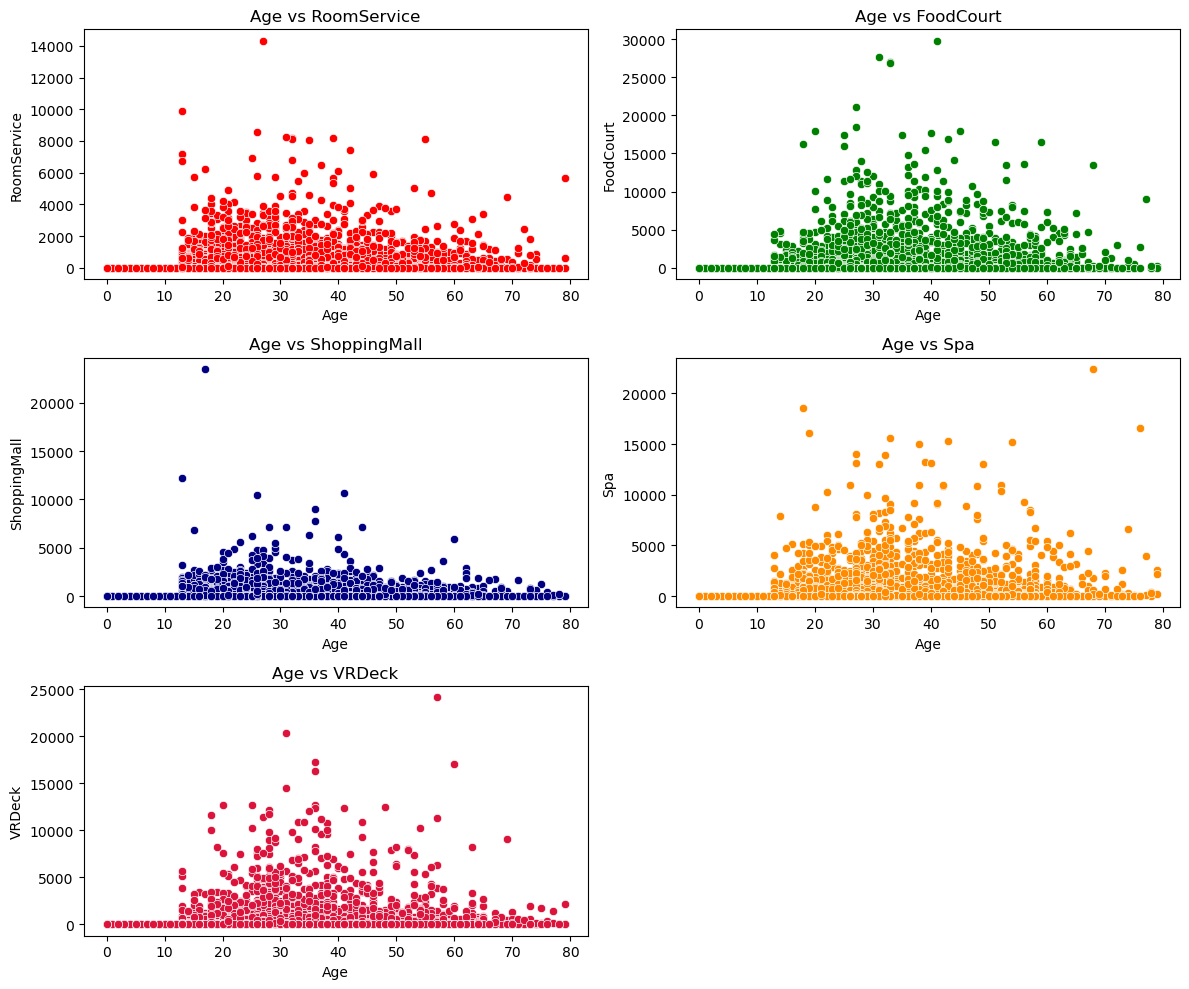

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
sns.scatterplot(data=df_train, x='Age', y='RoomService', ax=axes[0, 0],color="red")
axes[0, 0].set_title('Age vs RoomService')

sns.scatterplot(data=df_train, x='Age', y='FoodCourt', ax=axes[0, 1],color="green")
axes[0, 1].set_title('Age vs FoodCourt')

sns.scatterplot(data=df_train, x='Age', y='ShoppingMall', ax=axes[1, 0],color="navy")
axes[1, 0].set_title('Age vs ShoppingMall')

sns.scatterplot(data=df_train, x='Age', y='Spa', ax=axes[1, 1],color="darkorange")
axes[1, 1].set_title('Age vs Spa')


sns.scatterplot(data=df_train, x='Age', y='VRDeck', ax=axes[2, 0],color="crimson")
axes[2, 0].set_title('Age vs VRDeck')
fig.delaxes(axes[2, 1])

plt.tight_layout()

plt.show()

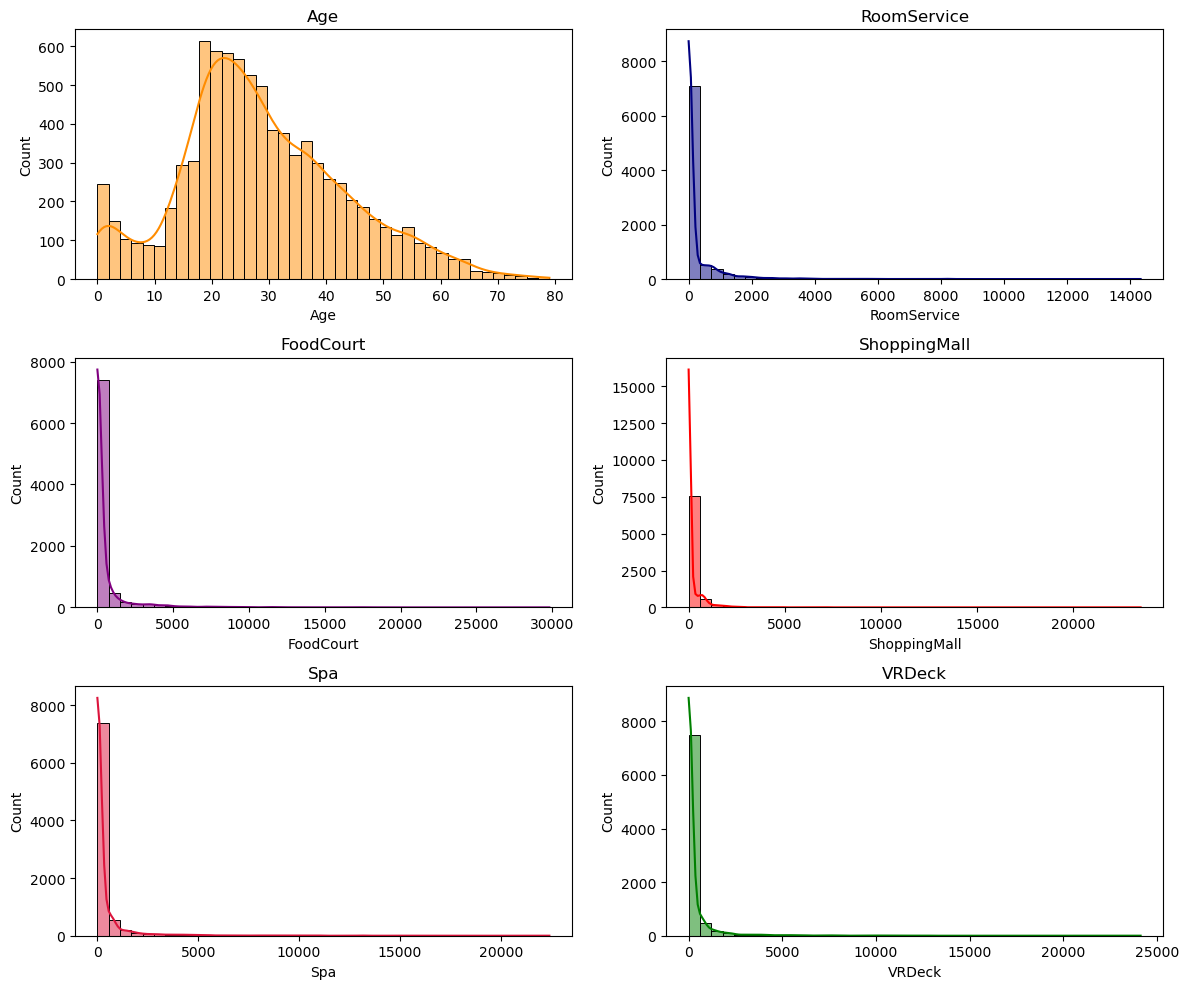

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

ax[0, 0].set_title("Age")
sns.histplot(data=df_train, x="Age", kde=True,bins=40,color="darkorange",ax=ax[0, 0])

ax[0, 1].set_title("RoomService")
sns.histplot(data=df_train, x="RoomService", kde=True,bins=40,color="navy", ax=ax[0, 1])

ax[1, 0].set_title("FoodCourt")
sns.histplot(data=df_train, x="FoodCourt",kde=True,color="purple",bins=40, ax=ax[1, 0])

ax[1, 1].set_title("ShoppingMall")
sns.histplot(data=df_train, x="ShoppingMall",color="red",kde=True,bins=40, ax=ax[1, 1])

ax[2, 0].set_title("Spa")
sns.histplot(data=df_train, x="Spa", kde=True,bins=40,color="crimson", ax=ax[2, 0])

ax[2, 1].set_title("VRDeck")
sns.histplot(data=df_train, x="VRDeck", kde=True,bins=40,color="green", ax=ax[2, 1])

plt.tight_layout()
plt.show()


# Data Preprocessing

### Fill Null Values Using Mode

In [18]:
mode_value0 = df_train["HomePlanet"].mode()[0]
df_train["HomePlanet"].fillna(mode_value0, inplace=True)
mode_value1 = df_train["CryoSleep"].mode()[0]
df_train["CryoSleep"].fillna(mode_value1, inplace=True)
mode_value2 = df_train["Cabin"].mode()[0]
df_train["Cabin"].fillna(mode_value2, inplace=True)
mode_value3 = df_train["Destination"].mode()[0]
df_train["Destination"].fillna(mode_value3, inplace=True)
mode_value4 = df_train["VIP"].mode()[0]
df_train["VIP"].fillna(mode_value4, inplace=True)

# Fill Null Values Using Mean

In [19]:
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(mean_age, inplace=True)
roomservice_mean=df_train["RoomService"].mean()
df_train['RoomService'].fillna(roomservice_mean, inplace=True)
foodcourt_mean=df_train["FoodCourt"].mean()
df_train['FoodCourt'].fillna(foodcourt_mean, inplace=True)
shop_mean=df_train["ShoppingMall"].mean()
df_train['ShoppingMall'].fillna(shop_mean, inplace=True)
spa_mean=df_train["Spa"].mean()
df_train['Spa'].fillna(spa_mean, inplace=True)
vr_mean=df_train["VRDeck"].mean()
df_train['VRDeck'].fillna(vr_mean, inplace=True)

# Using LabelEncoder For Transform Data 

In [20]:
label_encoder = LabelEncoder()
transform_col=["CryoSleep","VIP","Transported"]
for col in transform_col:
    label_encoder.fit([False, True])  
    df_train[col] = label_encoder.transform(df_train[col])

# Transform HomePlanet

In [21]:
home_col=['Europa', 'Earth', 'Mars']
label_encoder.fit(home_col)
df_train["HomePlanet"]=label_encoder.transform(df_train["HomePlanet"])


# Transform Destination

In [22]:
home_col=['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']
label_encoder.fit(home_col)
df_train["Destination"]=label_encoder.transform(df_train["Destination"])

# Transform Cabin 

In [23]:
df_train['Cabin'] = label_encoder.fit_transform(df_train['Cabin'])

# Drop Id,Name

In [24]:
df_train.drop(["PassengerId","Name"], axis=1,inplace=True)

# Scale Data Using StandardScaler

In [25]:
scaler = StandardScaler()
scale_col=["Cabin","Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
df_train[scale_col]=scaler.fit_transform(df_train[scale_col])

In [26]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,-1.531918,2,0.709437,0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,0
1,0,0,-0.516332,2,-0.336717,0,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,1
2,1,0,-1.605779,2,2.034566,1,-0.275409,1.955616,-0.290817,5.694289,-0.225782,0
3,1,0,-1.605779,2,0.290975,0,-0.340590,0.517406,0.330225,2.683471,-0.098708,0
4,0,0,-0.515334,2,-0.894666,0,0.118709,-0.243409,-0.038048,0.225732,-0.267258,1


# masked Lower triangle

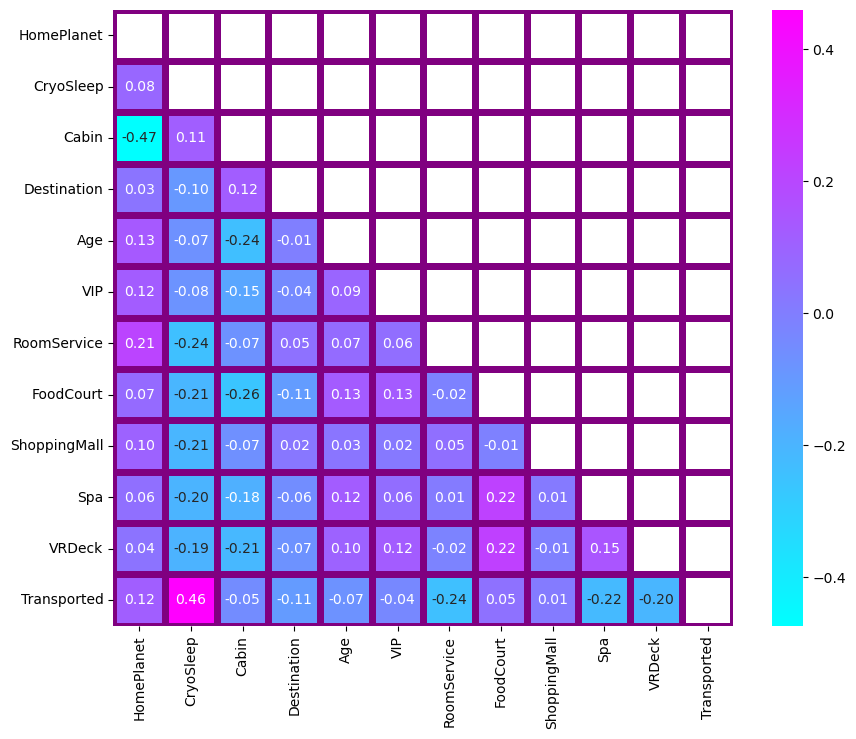

In [27]:
plt.figure(figsize=(10,8))
corr=df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, cmap="cool", fmt=".2f", linewidths=5, linecolor='purple')

plt.show()

# Upper Triangle

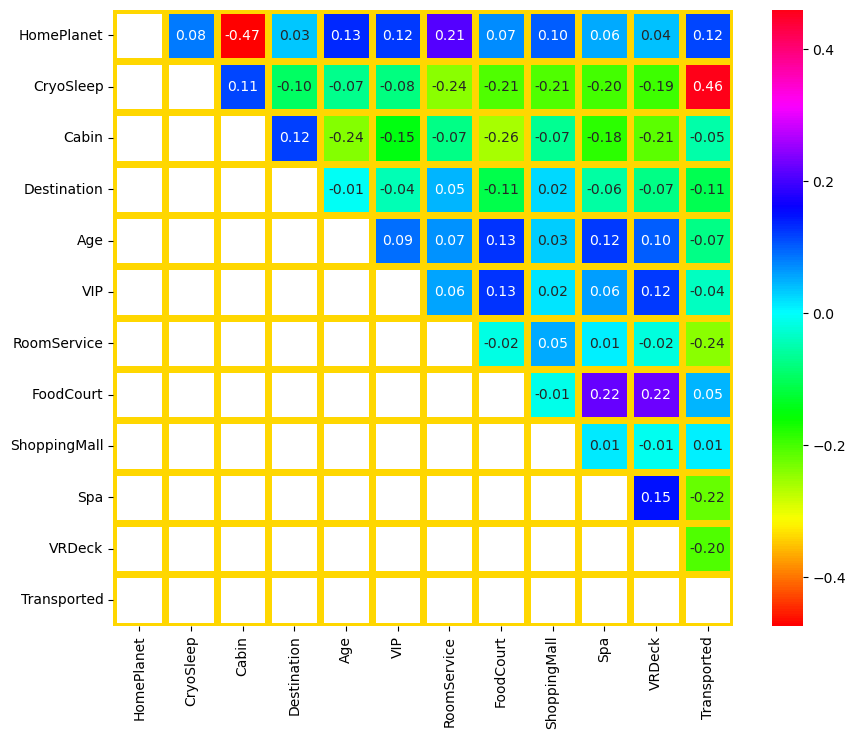

In [28]:
plt.figure(figsize=(10,8))
mask = np.tril(np.ones_like(corr, dtype=bool))
masked_corr = corr.mask(mask)
sns.heatmap(masked_corr, annot=True, cmap="hsv", fmt=".2f", linewidths=5, linecolor='gold')

plt.show()

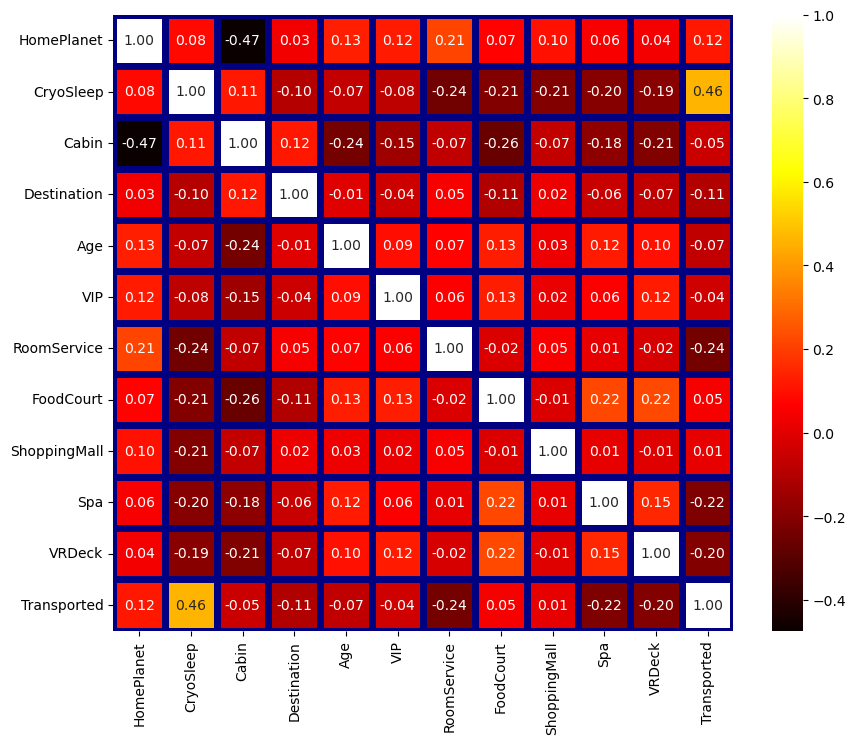

In [29]:
plt.figure(figsize=(10,8))

sns.heatmap(corr,annot=True,cmap="hot",fmt=".2f", linewidths=5, linecolor='navy')
plt.show()

In [30]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,-1.531918,2,0.709437,0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,0
1,0,0,-0.516332,2,-0.336717,0,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,1
2,1,0,-1.605779,2,2.034566,1,-0.275409,1.955616,-0.290817,5.694289,-0.225782,0
3,1,0,-1.605779,2,0.290975,0,-0.340590,0.517406,0.330225,2.683471,-0.098708,0
4,0,0,-0.515334,2,-0.894666,0,0.118709,-0.243409,-0.038048,0.225732,-0.267258,1


In [31]:
train_col=["HomePlanet","CryoSleep","Cabin","Destination","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

In [32]:
train_data=df_train[train_col]
label_data=df_train["Transported"]

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data,label_data,test_size=0.2,random_state=42)

# CatBoost Classifier

In [34]:
params = {'learning_rate': 0.1, 'depth': 6,'l2_leaf_reg': 3, 'iterations': 200}
cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, Y_train,eval_set=(X_test, Y_test),early_stopping_rounds=30,  
          verbose=100)


0:	learn: 0.6453523	test: 0.6454077	best: 0.6454077 (0)	total: 51.8ms	remaining: 10.3s
100:	learn: 0.3683463	test: 0.4122452	best: 0.4122452 (100)	total: 441ms	remaining: 432ms
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.4115032579
bestIteration = 123

Shrink model to first 124 iterations.


In [35]:
y_pred = cat_model.predict(X_test)
cat_accuracy = (y_pred == np.array(Y_test)).mean()
print("Validation Accuracy:", cat_accuracy)

Validation Accuracy: 0.8016101207590569


![](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

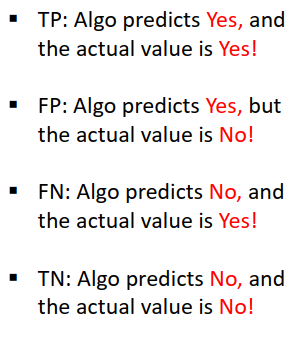

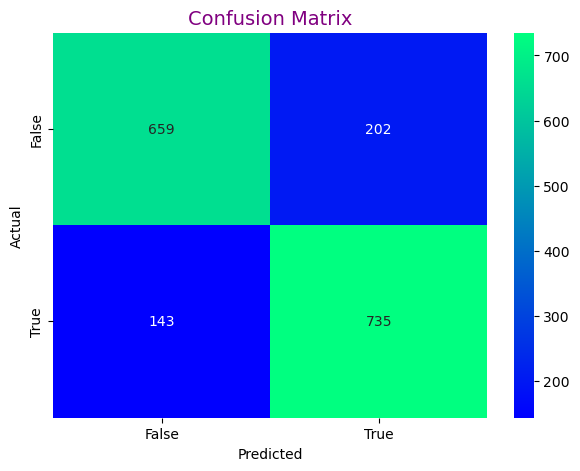

In [36]:
plt.figure(figsize=(7,5))
label_name=["False","True"]
cf_matrix=confusion_matrix(Y_test,y_pred)
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="winter",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix",fontsize=14,color="purple")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [37]:
print(classification_report(Y_test,y_pred,target_names=label_name))

              precision    recall  f1-score   support

       False       0.82      0.77      0.79       861
        True       0.78      0.84      0.81       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



# XGBClassifier

In [38]:
xgbc = XGBClassifier()
xgbc.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [39]:
xgb_pred=xgbc.predict(X_test)
xgb_accuracy=accuracy_score(Y_test,xgb_pred)
print("Accuracy Score is :",xgb_accuracy)

Accuracy Score is : 0.7855089131684876


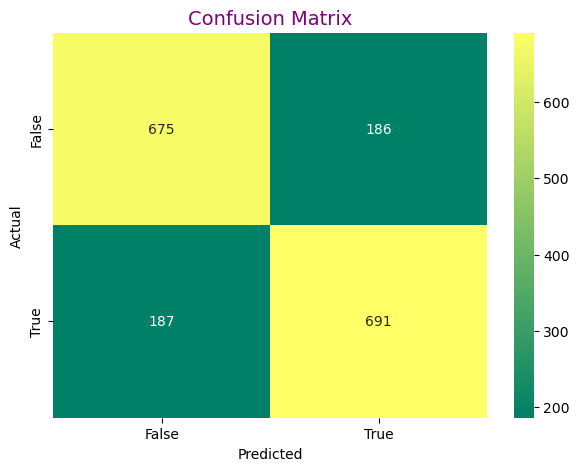

In [40]:
plt.figure(figsize=(7,5))
label_name=["False","True"]
cf_matrix=confusion_matrix(Y_test,xgb_pred)
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="summer",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix",fontsize=14,color="purple")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [41]:
print(classification_report(Y_test,xgb_pred,target_names=label_name))

              precision    recall  f1-score   support

       False       0.78      0.78      0.78       861
        True       0.79      0.79      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



# GradientBoostingClassifier

In [42]:
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01,max_depth=5, random_state=24)
gb.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=200,
                           random_state=24)

In [43]:
gb_pred=gb.predict(X_test)
gb_accuracy=accuracy_score(Y_test,xgb_pred)
print("Accuracy Score is :",gb_accuracy)

Accuracy Score is : 0.7855089131684876


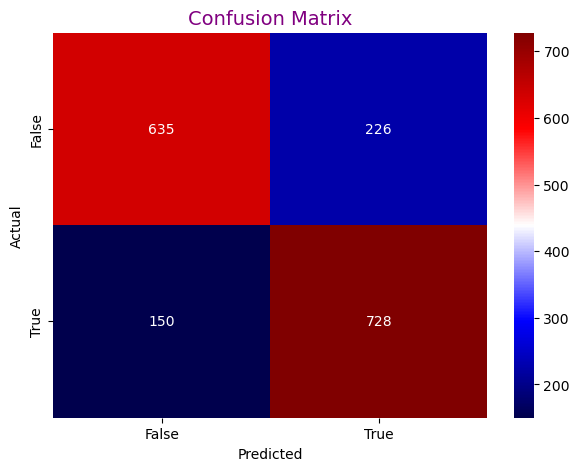

In [44]:
plt.figure(figsize=(7,5))
label_name=["False","True"]
cf_matrix=confusion_matrix(Y_test,gb_pred)
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="seismic",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix",fontsize=14,color="purple")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
print(classification_report(Y_test,gb_pred,target_names=label_name))

              precision    recall  f1-score   support

       False       0.81      0.74      0.77       861
        True       0.76      0.83      0.79       878

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739



# LGBMClassifier

In [46]:
lgb_model=LGBMClassifier(n_estimators=100)


In [47]:
lgb_model.fit(X_train, Y_train,eval_set=[(X_test, Y_test),(X_train, Y_train)],verbose=20,eval_metric='logloss')

/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.401212	valid_0's binary_logloss: 0.435453
[40]	training's binary_logloss: 0.350957	valid_0's binary_logloss: 0.413554
[60]	training's binary_logloss: 0.323535	valid_0's binary_logloss: 0.413214
[80]	training's binary_logloss: 0.30297	valid_0's binary_logloss: 0.416537
[100]	training's binary_logloss: 0.285781	valid_0's binary_logloss: 0.419911


LGBMClassifier()

In [48]:
lgb_pred=lgb_model.predict(X_test)
lgb_accuracy=accuracy_score(Y_test,lgb_pred)
print("Accuracy Score is :",lgb_accuracy)

Accuracy Score is : 0.7929844738355377


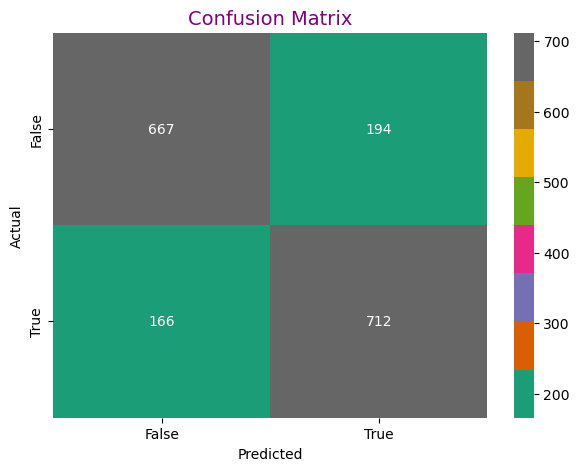

In [49]:
plt.figure(figsize=(7,5))
label_name=["False","True"]
cf_matrix=confusion_matrix(Y_test,lgb_pred)
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="Dark2",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix",fontsize=14,color="purple")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
print(classification_report(Y_test,lgb_pred,target_names=label_name))

              precision    recall  f1-score   support

       False       0.80      0.77      0.79       861
        True       0.79      0.81      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



# DecisionTree Classifier

In [51]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [52]:
dt_pred=dt_model.predict(X_test)
dt_accuracy=accuracy_score(Y_test,dt_pred)
print("Accuracy Score is :",dt_accuracy)

Accuracy Score is : 0.7406555491661875


In [53]:

text_representation = tree.export_text(dt_model)
print(text_representation)


|--- feature_1 <= 0.50
|   |--- feature_6 <= 0.18
|   |   |--- feature_9 <= 0.10
|   |   |   |--- feature_10 <= 0.04
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- feature_9 <= -0.16
|   |   |   |   |   |   |--- feature_10 <= -0.16
|   |   |   |   |   |   |   |--- feature_6 <= -0.18
|   |   |   |   |   |   |   |   |--- feature_2 <= -0.31
|   |   |   |   |   |   |   |   |   |--- feature_2 <= -0.46
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.26
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.26
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- feature_2 >  -0.46
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= -0.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  -0.25
|   |   |   |   |   |   |   |   |   | 

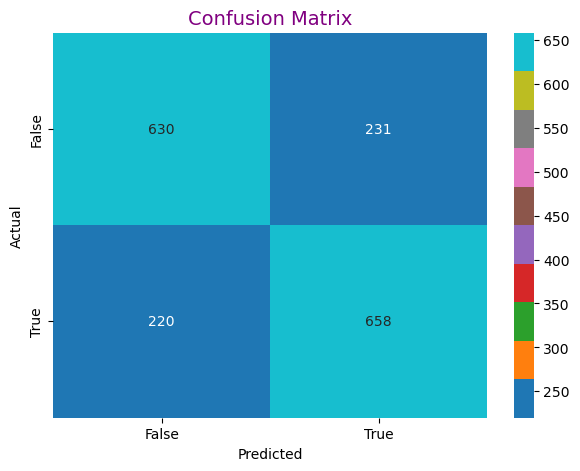

In [54]:
plt.figure(figsize=(7,5))
label_name=["False","True"]
cf_matrix=confusion_matrix(Y_test,dt_pred)
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="tab10",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix",fontsize=14,color="purple")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [55]:
print(classification_report(Y_test,dt_pred,target_names=label_name))

              precision    recall  f1-score   support

       False       0.74      0.73      0.74       861
        True       0.74      0.75      0.74       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739



# ALL Model Result

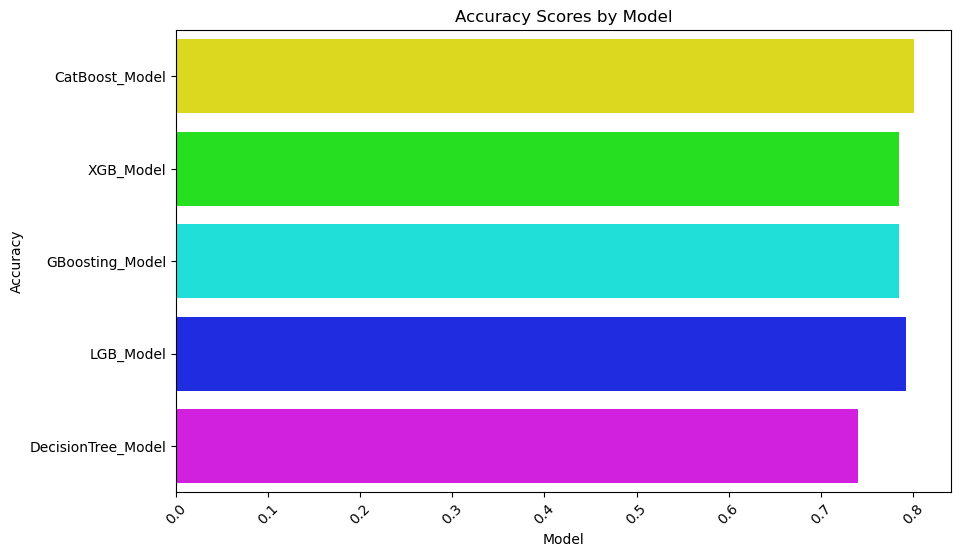

In [56]:
model_name = ["CatBoost_Model", "XGB_Model", "GBoosting_Model", "LGB_Model", "DecisionTree_Model"]
model_accuracy = [cat_accuracy, xgb_accuracy, gb_accuracy, lgb_accuracy, dt_accuracy]
plt.figure(figsize=(10, 6))  
sns.barplot(y=model_name, x=model_accuracy,palette="hsv")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores by Model")
plt.xticks(rotation=45)
plt.show()


# Test Data Analysis

In [57]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [58]:
df_test.shape

(4277, 13)

In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [60]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [61]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [62]:
df_test.drop("Name",axis=1,inplace=True)

# Fill Null Values

In [63]:
mode_value0 = df_test["HomePlanet"].mode()[0]
df_test["HomePlanet"].fillna(mode_value0, inplace=True)

mode_value1 = df_test["CryoSleep"].mode()[0]
df_test["CryoSleep"].fillna(mode_value1, inplace=True)

mode_value6 = df_test["Cabin"].mode()[0]
df_test["Cabin"].fillna(mode_value6, inplace=True)

mode_value3 = df_test["Destination"].mode()[0]
df_test["Destination"].fillna(mode_value3, inplace=True)

mode_value4 = df_test["VIP"].mode()[0]
df_test["VIP"].fillna(mode_value4, inplace=True)

In [64]:
mean_age = df_test['Age'].mean()
df_test['Age'].fillna(mean_age, inplace=True)
roomservice_mean=df_test["RoomService"].mean()
df_test['RoomService'].fillna(roomservice_mean, inplace=True)
foodcourt_mean=df_test["FoodCourt"].mean()
df_test['FoodCourt'].fillna(foodcourt_mean, inplace=True)
shop_mean=df_test["ShoppingMall"].mean()
df_test['ShoppingMall'].fillna(shop_mean, inplace=True)
spa_mean=df_test["Spa"].mean()
df_test['Spa'].fillna(spa_mean, inplace=True)
vr_mean=df_test["VRDeck"].mean()
df_test['VRDeck'].fillna(vr_mean, inplace=True)

In [65]:
df_test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [66]:
label_encoder = LabelEncoder()
transform_col=["CryoSleep","VIP"]
for col in transform_col:
    label_encoder.fit([False, True])  
    df_test[col] = label_encoder.transform(df_test[col])

In [67]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0


# Transform HomePlanet,Destination,Cabin

In [68]:
home_col=['Europa', 'Earth', 'Mars']
label_encoder.fit(home_col)
df_test["HomePlanet"]=label_encoder.transform(df_test["HomePlanet"])

In [69]:
home_col=['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']
label_encoder.fit(home_col)
df_test["Destination"]=label_encoder.transform(df_test["Destination"])


In [70]:
df_test["Cabin"]=label_encoder.fit_transform(df_test["Cabin"])

In [71]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,1,2784,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,0,1867,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,1,257,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,0,259,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,0,1940,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [72]:
PassengerId=df_test.PassengerId

In [73]:
df_test.drop("PassengerId",axis=1,inplace=True)

In [74]:
my_prediction=cat_model.predict(df_test)
my_pred=my_prediction.astype(bool)
my_submission=pd.DataFrame({'PassengerId':PassengerId,'Transported':my_pred})
my_submission.to_csv('submission.csv',index=False)

In [75]:
my_submission.head(20)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
5,0027_01,False
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True
